# <span style="color:orange"> Assignment 05- Weather.<span>
*By Laura Lyons*
***

The purpose of this assignement is to create a python file or notebook called assignment_6_Weather (.py or .ipynb)

Get the data from this link: https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv and plot the following variables:

1. Temperature
2. Mean temperature each day
3. Mean temperature for each month

Additional marks are available for plotting:

4. Windspeed (there is data missing from this column)
5. The rolling windspeed (say over 24 hours)
6. The max windspeed for each day
7. The monthly mean of the daily max windspeeds (yer I am being nasty here)

#### <span style="color:orange">Prerequisites/ Imports <span>

The first step is to download a number of imports:

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### <span style="color:orange"> Load the Data<span>

The [data](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv) was downloaded from the link provided on the [assessment document](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv).

Before analysis, it is best practice to assess the data integrity and manipulate as necessary ie (remove/ replace missing data, ensure the row headers are appropriate/present etc.)

At first glance, i can see that we will need to amend the data set prior to analysis by:
1. Downloading the data set.
1. Removing the first 23 rows, as these rows do not contain data of interest to this analysis.

In [105]:
# Dowdload the dataset
url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'

# Define column names
column_names = ['date_time', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'wddir', 'ind.4', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt']

# Load the dataset with the specified column names
# Skip the first 23 rows of the dataset
df = pd.read_csv(url, names=column_names, header=0, skiprows=23, low_memory=False)

# Drop specific columns by their names
columns_to_drop = ['ind', 'rain', 'ind.1', 'ind.2', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'ind.3', 'wddir', 'ind.4', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt']
df_dropped = df.drop(columns=columns_to_drop)
df_dropped.head()

,date_time,temp,wdsp
0,10-apr-1996 14:00,11.5,0
1,31-jul-1996 08:00,11.5,0
2,31-jul-1996 09:00,11.6,0
3,31-jul-1996 10:00,12.9,0
4,31-jul-1996 11:00,14.5,0


In [106]:
# df_dropped.set_index('date_time', inplace=True) 
# df_dropped.head()

In [137]:
df_dropped['date_time'] = pd.to_datetime(df_dropped['date_time'])

# Extract year, month, day, and time into separate columns
df_dropped['year'] = df_dropped['date_time'].dt.year
df_dropped['month'] = df_dropped['date_time'].dt.month
df_dropped['day'] = df_dropped['date_time'].dt.day
df_dropped['time'] = df_dropped['date_time'].dt.time
df_dropped['month_year'] = df_dropped['date_time'].dt.to_period('M')

# Display the first few rows of the DataFrame
print(df_dropped.head())

            date_time  temp wdsp       date      time  month  year  day  \
0 1996-04-10 14:00:00  11.5    0 1996-04-10  14:00:00      4  1996   10   
1 1996-07-31 08:00:00  11.5    0 1996-07-31  08:00:00      7  1996   31   
2 1996-07-31 09:00:00  11.6    0 1996-07-31  09:00:00      7  1996   31   
3 1996-07-31 10:00:00  12.9    0 1996-07-31  10:00:00      7  1996   31   
4 1996-07-31 11:00:00  14.5    0 1996-07-31  11:00:00      7  1996   31   

  month_year  
0    1996-04  
1    1996-07  
2    1996-07  
3    1996-07  
4    1996-07  


***
#### <span style="color:orange"> Plot 1: Daily Temperature Over Time <span>

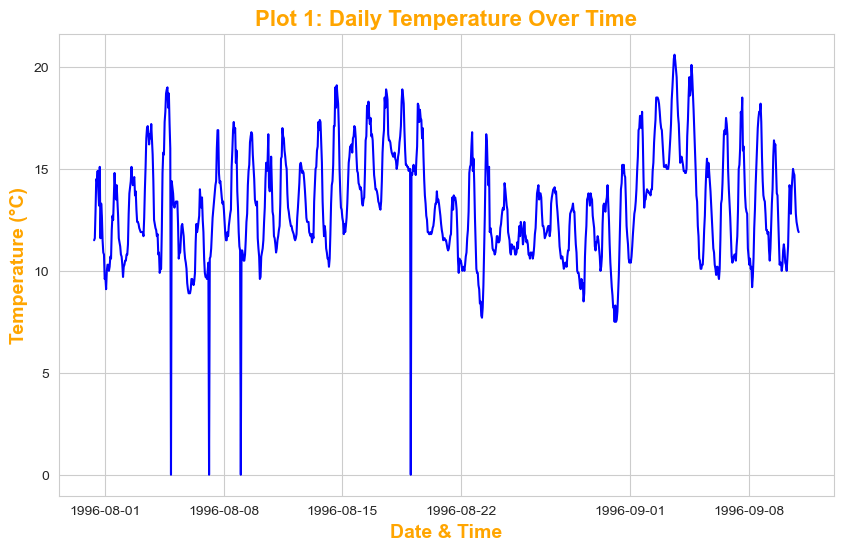

In [ ]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))
# The code was timng out when plotting the entire dataset, so I have limited to the first 1000 rows.
sns.lineplot(data=df_dropped.iloc[1:1001], x='date_time', y='temp', color='blue')

# Add titles and labels, fontweight='bold'
plt.title('Plot 1: Daily Temperature Over Time', fontsize=16, fontweight='bold', color='orange')
plt.xlabel('Date & Time', fontsize=14, fontweight='bold', color='orange')
plt.ylabel('Temperature (°C)', fontsize=14, fontweight='bold', color='orange')
plt.show()

***
#### <span style="color:orange"> Plot 2: Mean Daily Temperature Over Time. <span>

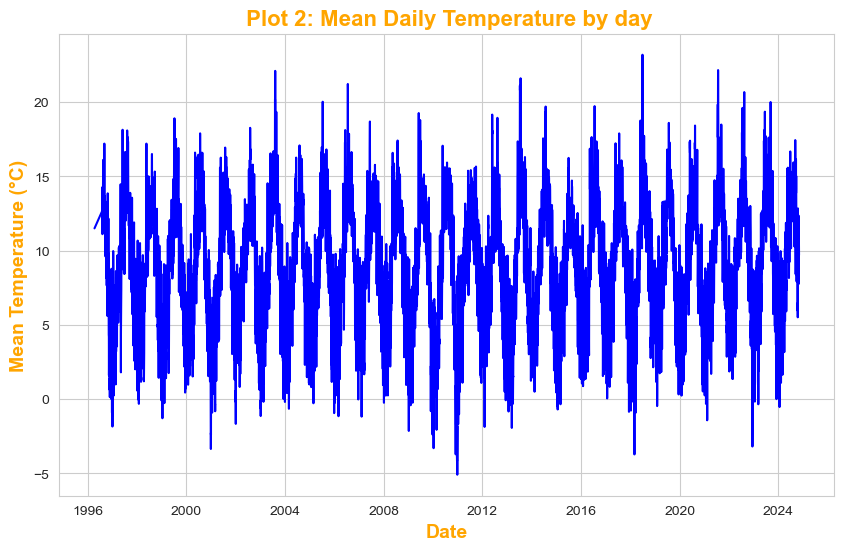

In [119]:
# Calculate the mean temperature for each day
mean_daily_temp = df_dropped.groupby('date')['temp'].mean().reset_index()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_daily_temp, x='date', y='temp', color='blue')

# Add titles and labels
plt.title(' Plot 2: Mean Daily Temperature by day', fontsize=16, fontweight='bold', color='orange')
plt.xlabel('Date', fontsize=14, fontweight='bold', color='orange')
plt.ylabel('Mean Temperature (°C)', fontsize=14, fontweight='bold', color='orange')

# Show the plot
plt.show()

***
#### <span style="color:orange"> Plot 3: Mean Monthly Temperature Over Time. <span>

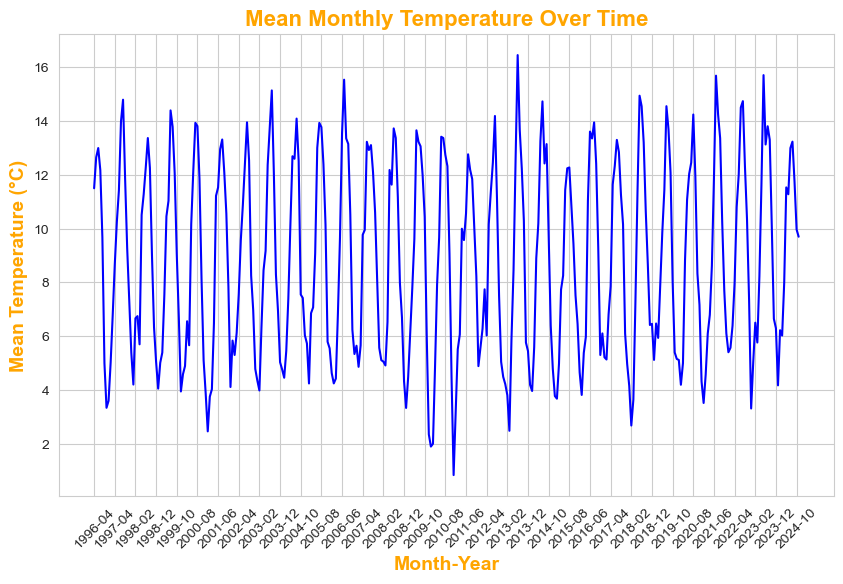

In [160]:
mean_monthly_temp = df_dropped.groupby('month_year')['temp'].mean().reset_index()
mean_monthly_temp['month_year'] = mean_monthly_temp['month_year'].astype(str)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data= mean_monthly_temp, x='month_year', y='temp', color='blue')

# Add titles and labels
plt.title('Mean Monthly Temperature Over Time', fontsize=16, fontweight='bold', color='orange')
plt.xlabel('Month-Year', fontsize=14, color='orange', fontweight='bold')
plt.ylabel('Mean Temperature (°C)', fontsize=14, color='orange', fontweight='bold')

# Limit the number of x-axis labels by setting intervals 
# (Source: https://stackoverflow.com/questions/6682784/reducing-number-of-plot-ticks)
plt.xticks(ticks=mean_monthly_temp.index[::10], labels=mean_monthly_temp['month_year'][::10], rotation=45)

# Show the plot
plt.show()


***
#### <span style="color:orange"> Plot 4: Windspeed Over Time. <span>

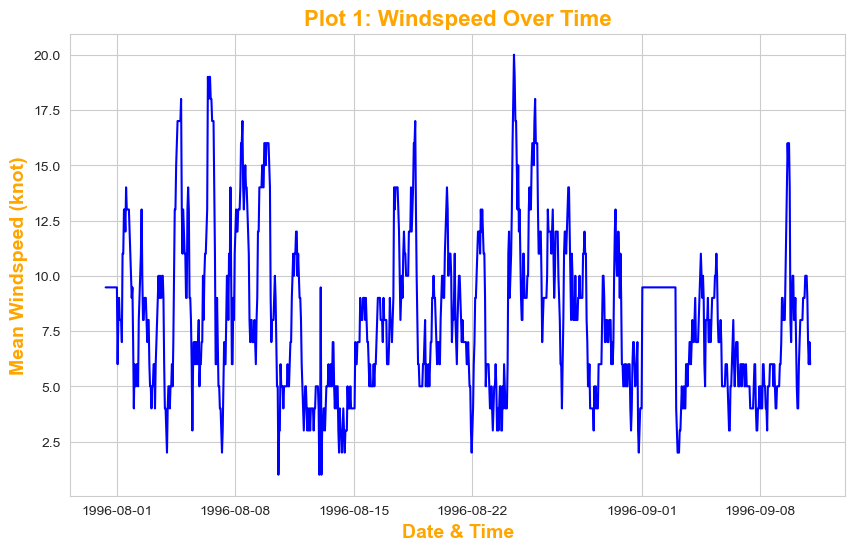

In [ ]:
# A future warning appreared after running the code below.
# Code used to ignore the FutureWarnings
# Reference : https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Convert non-numeric strings to NaN
df_dropped['temp'] = pd.to_numeric(df_dropped['temp'], errors='coerce')
df_dropped['wdsp'] = pd.to_numeric(df_dropped['wdsp'], errors='coerce')

# Replace 0 with NaN
df_dropped.replace(0, np.nan, inplace=True)

# Calculate the mean of the 'temp' and 'wdsp' columns, ignoring NaN values
temp_mean = df_dropped['temp'].mean()
wdsp_mean = df_dropped['wdsp'].mean()

# Replace NaN values with the column mean
df_dropped['temp'].fillna(temp_mean, inplace=True)
df_dropped['wdsp'].fillna(wdsp_mean, inplace=True)

# Lets plot the data.
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_dropped.iloc[1:1001], x='date_time', y='wdsp', color='blue')

# Add titles and labels, fontweight='bold'
plt.title('Plot 4: Windspeed Over Time', fontsize=16, fontweight='bold', color='orange')
plt.xlabel('Date & Time', fontsize=14, fontweight='bold', color='orange')
plt.ylabel('Mean Windspeed (knot)', fontsize=14, fontweight='bold', color='orange')
plt.show()

In [ ]:
# Convert non-numeric strings to NaN
df_dropped['temp'] = pd.to_numeric(df_dropped['temp'], errors='coerce')
df_dropped['wdsp'] = pd.to_numeric(df_dropped['wdsp'], errors='coerce')

# First we need to deal with the missing data.
df_dropped.replace(0, np.nan, inplace=True)
print("\nDataFrame after replacing 0 with NaN:")
 
# Calculate the mean of the 'temperature' and 'windspeed (wdsp)' columns, ignoring NaN values
temp_mean = df_dropped['temp'].mean()
wdsp_mean = df_dropped['wdsp'].mean()
print(f"\nMean Temperature: {temp_mean}")
print(f"Mean Windspeed: {wdsp_mean}")

# Replace NaN values with the column mean
df_dropped.method('temp', inplace=True)
df-df_dropped['temp'].fillna(temp_mean, inplace=True)
df_dropped['wdsp'].fillna(wdsp_mean, inplace=True)



DataFrame after replacing 0 with NaN:

Mean Temperature: 8.782315753710003
Mean Windspeed: 9.475167464889005


C:\Users\Laura\AppData\Local\Temp\ipykernel_13888\2231638506.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df-df_dropped['temp'].fillna(temp_mean, inplace=True)


TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

In [114]:
# Calculate the rolling mean for the temperature with a window size of 31 days
mean_monthly_temp['rolling_mean'] = mean_monthly_temp['temp'].rolling(window=31).mean()

# Set the style of the plot
sns.set_style("whitegrid")

# Create line plots
plt.figure(figsize=(10, 6))

sns.lineplot(data=mean_daily_temp, x='date', y='rolling_mean', color='red', label='Mean monthly temperature')

# Add titles and labels
plt.title('Mean Monthly Temperature Over Time', fontsize=16, fontweight='bold', color='orange')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mean Temperature (°C)', fontsize=14)

# Show legend
plt.legend()

# Show the plot
plt.show()


ValueError: Could not interpret value `rolling_mean` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

***
### <span style="color:orange"> End